<a href="https://colab.research.google.com/github/GadAugust/Energy-Efficient-Residential-Building-Model/blob/main/energy_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
energy_path = os.path.abspath('/content/drive/MyDrive/ENB2012_data.csv')

In [ ]:
energy= pd.read_csv(energy_path)


In [ ]:
energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
# Printing the first few rows of the data
energy.head()



,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Summary of the data
energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
# Displaying the structure of the data
energy.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
# Printing the names of the columns in the data
energy.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'],
      dtype=object)

In [ ]:
# Renaming the columns of the data
energy = energy.rename(columns={'X1': 'Relative_Compactness',
                                'X2': 'Surface_Area',
                                'X3': 'Wall_Area',
                                'X4': 'Roof_Area',
                                'X5': 'Overall_Height',
                                'X6': 'Orientation',
                                'X7': 'Glazing_Area',
                                'X8': 'Glazing_Area_Distribution',
                                'Y1': 'Heating_Load',
                                'Y2': 'Cooling_Load'})


In [ ]:
energy

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


#Cleaning Data

In [ ]:
# Calculating the sum of missing values in each column of the data
energy.isnull().sum()


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

#cleaning blank observations

In [ ]:
# Calculating the sum of empty values in each column of the data
energy.eq('').sum()


Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

#Scaling the data set¶

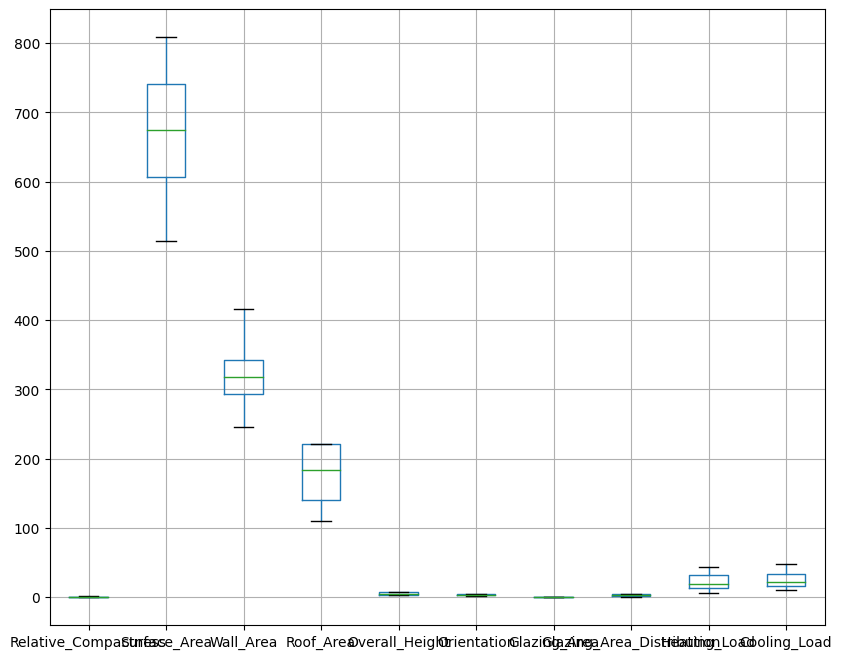

In [ ]:
# Creating a boxplot of the data
energy.boxplot(figsize=(10, 8))
plt.show()


In [ ]:
# Scaling the first eight columns of the data
energy.iloc[:, :8] = preprocessing.scale(energy.iloc[:, :8])


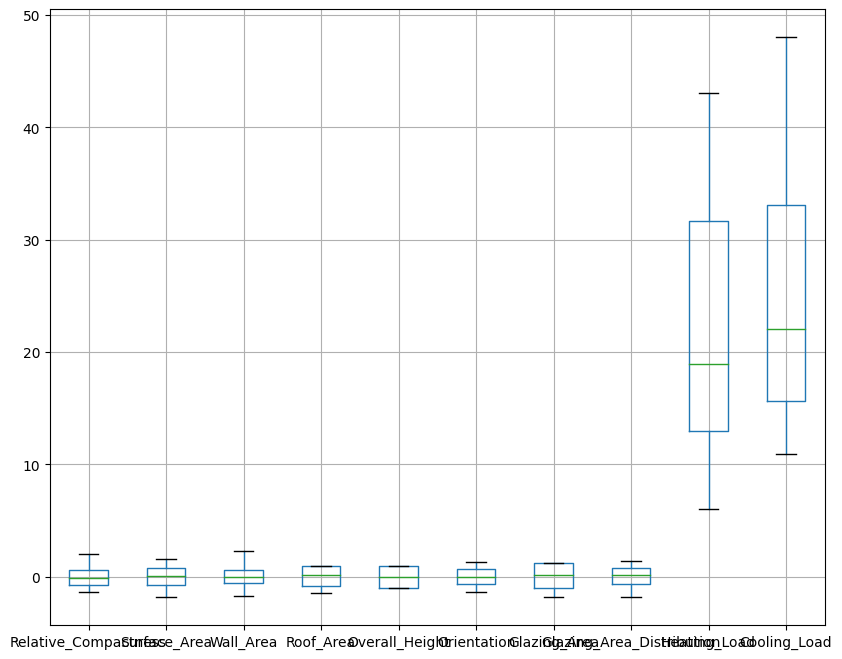

In [ ]:
# Creating a boxplot of the Scaled data
energy.boxplot(figsize=(10, 8))
plt.show()

In [ ]:
# Setting the number of decimal digits to display
np.set_printoptions(precision=3)

# Formatting the mean of the first eight columns of the data
mean_values = np.mean(energy.iloc[:, :8], axis=0)
print(mean_values)


Relative_Compactness        -7.401487e-17
Surface_Area                -4.163336e-16
Wall_Area                    0.000000e+00
Roof_Area                    2.174187e-16
Overall_Height               0.000000e+00
Orientation                  0.000000e+00
Glazing_Area                 1.480297e-16
Glazing_Area_Distribution    0.000000e+00
dtype: float64


In [ ]:
# Calculating the standard deviation of numeric columns in the data
energy.drop(['Heating_Load', 'Cooling_Load'], axis=1).select_dtypes(include=[np.number]).apply(np.std)


Relative_Compactness         1.0
Surface_Area                 1.0
Wall_Area                    1.0
Roof_Area                    1.0
Overall_Height               1.0
Orientation                  1.0
Glazing_Area                 1.0
Glazing_Area_Distribution    1.0
dtype: float64

#Data Visualization

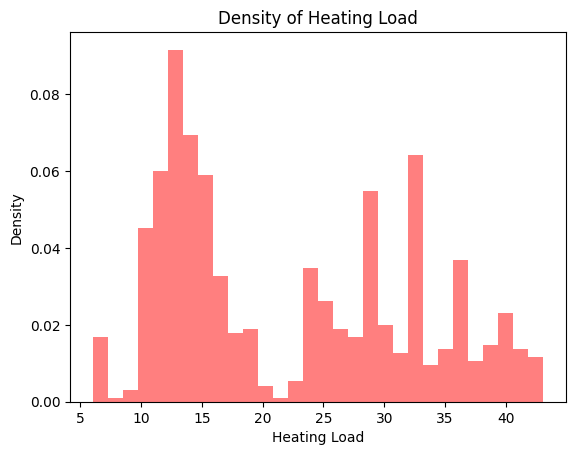

In [ ]:
# Creating a density plot of the heating load column
import matplotlib.pyplot as plt

plt.hist(energy['Heating_Load'], density=True, bins=30, color='red', alpha=0.5)
plt.xlabel('Heating Load')
plt.ylabel('Density')
plt.title('Density of Heating Load')
plt.show()


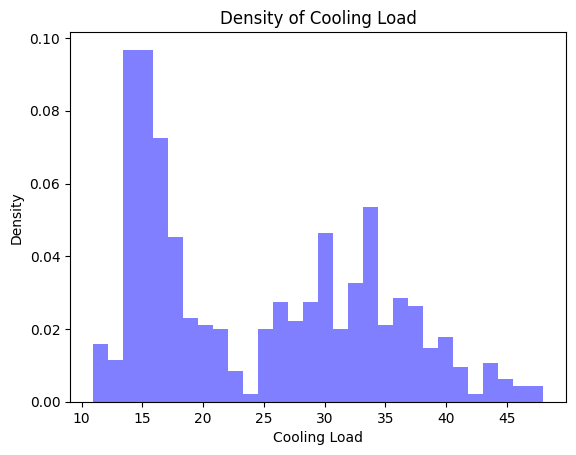

In [ ]:
# Creating a density plot of the cooling load column

plt.hist(energy['Cooling_Load'], density=True, bins=30, color='blue', alpha=0.5)
plt.xlabel('Cooling Load')
plt.ylabel('Density')
plt.title('Density of Cooling Load')
plt.show()

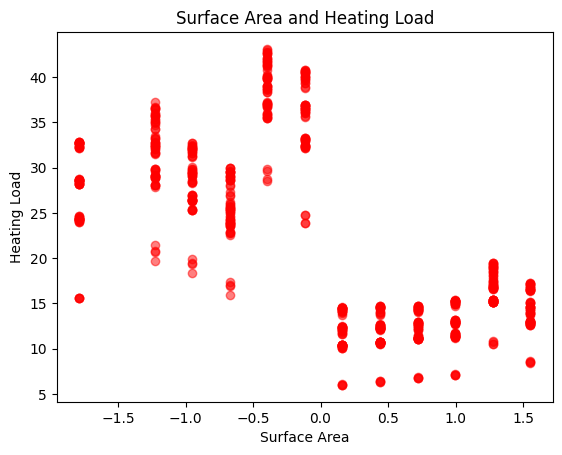

In [ ]:
# Creating a scatter plot of Surface_Area vs. Heating_Load using matplotlib
import matplotlib.pyplot as plt

plt.scatter(energy['Surface_Area'], energy['Heating_Load'], color='red', alpha=0.5)
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.title('Surface Area and Heating Load')
plt.show()


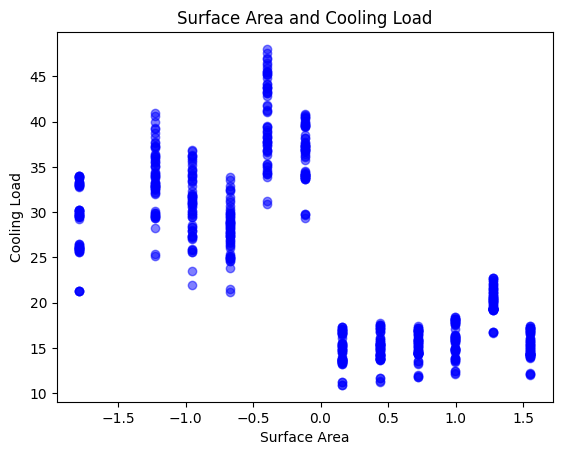

In [ ]:
# Creating a scatter plot of Surface_Area vs. Cooling_Load using matplotlib\

plt.scatter(energy['Surface_Area'], energy['Cooling_Load'], color='blue', alpha=0.5)
plt.xlabel('Surface Area')
plt.ylabel('Cooling Load')
plt.title('Surface Area and Cooling Load')
plt.show()


#Model Training

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Set random seed

np.random.seed(1)

In [ ]:
#Load data and split into train and test sets
train, test = train_test_split(energy, test_size=0.2)



checking to see if the test and train have similar outcomes


In [ ]:
# Calculating mean of Heating Load for train and test sets
train_mean = np.mean(train['Heating_Load'])
test_mean = np.mean(test['Heating_Load'])
print('Train set mean:', train_mean)
print('Test set mean:', test_mean)


Train set mean: 22.057312703583058
Test set mean: 23.303506493506493


In [ ]:
#Create k-fold parameters, k is 10

kf = KFold(n_splits=10, shuffle=True, random_state=7)

# Linear Regression

In [ ]:
lm = LinearRegression(fit_intercept=True)
X_train = train.iloc[:, :-2]
y_train = train.iloc[:, -2]
tune_grid = {'fit_intercept': [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]}
train_lm = GridSearchCV(lm, tune_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
train_lm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8,
                                           10]},
             scoring='neg_mean_squared_error')

In [ ]:
#View training results

print(train_lm.best_params_)
print(train_lm.best_score_)

{'fit_intercept': -10}
-8.446928781316055


In [ ]:
# creating predictions
lm_preds_hl = train_lm.predict(test.drop(columns=['Heating_Load', 'Cooling_Load']))


In [ ]:
# calculating the RMSE for the linear regression model
lm_rmse_hl = mean_squared_error(lm_preds_hl, test['Heating_Load'], squared=False)

print('RMSE:', lm_rmse_hl)

RMSE: 3.196891206880745


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lm_mse_hl = mean_squared_error(test['Heating_Load'], lm_preds_hl)
print('RMSE:', lm_mse_hl)

RMSE: 10.220113388631427


In [ ]:
# calculating the R-squared score for the linear regression model
lm_r2_hl = r2_score(test['Heating_Load'], lm_preds_hl)
print('R-squared score:', lm_r2_hl)

R-squared score: 0.8982968385161118


#LINEAR REGRESSION FOR COOLING LOAD

In [ ]:
import numpy as np
np.random.seed(1)

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(energy, test_size=0.2)

# Calculating mean of Cooling Load for train and test sets
train_mean = np.mean(train['Cooling_Load'])
test_mean = np.mean(test['Cooling_Load'])
print('Train set mean:', train_mean)
print('Test set mean:', test_mean)

from sklearn.model_selection import KFold

seed = 7
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=seed)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the k-fold parameters, k is 10
kf = KFold(n_splits=10, shuffle=True, random_state=7)

# training the model using train set
lm = LinearRegression(fit_intercept=True)
tune_grid = {'fit_intercept': [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]}
train_lm = GridSearchCV(lm, tune_grid, cv=kf, scoring='r2', n_jobs=-1)
train_lm.fit(train.drop(columns=['Cooling_Load']), train['Cooling_Load'])

# viewing training results
print(train_lm.best_params_)
print(train_lm.best_score_)

# creating predictions
lm_preds_cl = train_lm.predict(test.drop(columns=['Cooling_Load']))

# calculating the R2 score for the linear regression model
lm_r2_cl = r2_score(test['Cooling_Load'], lm_preds_cl)
print('R2 score for linear regression model on Cooling Load:', lm_r2_cl)

# calculating the RMSE for the linear regression model on Cooling Load
lm_rmse_cl = mean_squared_error(lm_preds_cl, test['Cooling_Load'], squared=False)
print("RMSE for Linear Regression on Cooling Load:", lm_rmse_cl)

Train set mean: 24.324869706840392
Test set mean: 25.635909090909088
{'fit_intercept': -10}
0.959556713283819
R2 score for linear regression model on Cooling Load: 0.9479606278434236
RMSE for Linear Regression on Cooling Load: 2.2009383922758055


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


#RIDGE REGRESSION

In [ ]:
import numpy as np
np.random.seed(1)

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(energy, test_size=0.2)

# Calculating mean of Heating Load for train and test sets
train_mean = np.mean(train['Heating_Load'])
test_mean = np.mean(test['Heating_Load'])
print('Train set mean:', train_mean)
print('Test set mean:', test_mean)

from sklearn.model_selection import KFold

seed = 7
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=seed)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# creating the k-fold parameters, k is 10
kf = KFold(n_splits=10, shuffle=True, random_state=7)

# training the model using train set
ridge = Ridge(alpha=1.0, fit_intercept=True)
tune_grid = {'alpha': [0.1, 1, 10]}
train_ridge = GridSearchCV(ridge, tune_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
train_ridge.fit(train.drop(columns=['Heating_Load']), train['Heating_Load'])

# viewing training results
print(train_ridge.best_params_)
print(train_ridge.best_score_)

# creating predictions
ridge_preds_hl = train_ridge.predict(test.drop(columns=['Heating_Load']))

# calculating the RMSE for the linear regression model
ridge_rmse_hl = mean_squared_error(ridge_preds_hl, test['Heating_Load'], squared=False)
print("RMSE for Ridge Regression on Heating Load:", ridge_rmse_hl)

# using trained model to predict cooling load
ridge_preds_cl = train_ridge.predict(test.drop(columns=['Heating_Load']))
test['Cooling_Load_Predicted'] = ridge_preds_cl

# calculating the RMSE for the cooling load predictions
ridge_rmse_cl = mean_squared_error(ridge_preds_cl, test['Cooling_Load'], squared=False)
print("RMSE for Ridge Regression on Cooling Load:", ridge_rmse_cl)

# calculating the R2 score for the ridge regression model
ridge_r2_cl = r2_score(test['Cooling_Load'], ridge_preds_cl)
print('R2 score for Ridge regression model on Cooling Load:', ridge_r2_cl)

# calculating the R2 score for the ridge regression model
ridge_r2_hl = r2_score(test['Heating_Load'], ridge_preds_hl)
print('R2 score for Ridge regression model on Heating Load:', ridge_r2_hl)


Train set mean: 22.057312703583058
Test set mean: 23.303506493506493
{'alpha': 1}
-3.0945225453661243
RMSE for Ridge Regression on Heating Load: 1.9257163431093363
RMSE for Ridge Regression on Cooling Load: 2.547827559532308
R2 score for Ridge regression model on Cooling Load: 0.9302641115945554
R2 score for Ridge regression model on Heating Load: 0.963096855690089


#Random Forest

In [ ]:
import numpy as np
np.random.seed(1)

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(energy, test_size=0.2)

# Calculating mean of Heating Load for train and test sets
train_mean = np.mean(train['Heating_Load'])
test_mean = np.mean(test['Heating_Load'])
print('Train set mean:', train_mean)
print('Test set mean:', test_mean)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# creating the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# creating the GridSearchCV object
rf = RandomForestRegressor(random_state=1)
train_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# fitting the model on the training data
train_rf.fit(train.drop(columns=['Heating_Load']), train['Heating_Load'])

# viewing training results
print(train_rf.best_params_)
print(train_rf.best_score_)

# creating predictions
rf_preds_hl = train_rf.predict(test.drop(columns=['Heating_Load']))

# calculating the RMSE for the Random Forest model on Heating Load
rf_rmse_hl = mean_squared_error(rf_preds_hl, test['Heating_Load'], squared=False)
print("RMSE for Random Forest on Heating Load:", rf_rmse_hl)

# using trained model to predict cooling load
rf_preds_cl = train_rf.predict(test.drop(columns=['Heating_Load']))
test['Cooling_Load_Predicted'] = rf_preds_cl

# calculating the RMSE for the cooling load predictions
rf_rmse_cl = mean_squared_error(rf_preds_cl, test['Cooling_Load'], squared=False)
print("RMSE for Random Forest on Cooling Load:", rf_rmse_cl)

# calculating the R2 score for the Random Forest model on Cooling Load
rf_r2_cl = r2_score(test['Cooling_Load'], rf_preds_cl)
print('R2 score for Random Forest model on Cooling Load:', rf_r2_cl)

# calculating the R2 score for the Random Forest model on Heating Load
rf_r2_hl = r2_score(test['Heating_Load'], rf_preds_hl)
print('R2 score for Random Forest model on Heating Load:', rf_r2_hl)


Train set mean: 22.057312703583058
Test set mean: 23.303506493506493
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9931009748059132
RMSE for Random Forest on Heating Load: 1.1127166482534883
RMSE for Random Forest on Cooling Load: 3.045722400827961
R2 score for Random Forest model on Cooling Load: 0.9003455008102155
R2 score for Random Forest model on Heating Load: 0.9876789445798769


#ENSEMBLE FOR HEATING LOADS

In [ ]:
from sklearn.metrics import r2_score

heating_preds = pd.DataFrame({"lm": lm_preds_hl,
                              "ridge": ridge_preds_hl,
                              "rf": rf_preds_hl})

ensemble_preds_hl = heating_preds.mean(axis=1)
heating_preds["ensemble"] = ensemble_preds_hl

ensemble_rmse_hl = mean_squared_error(ensemble_preds_hl, test["Heating_Load"], squared=False)
print("RMSE for Ensemble model on Heating Load:", ensemble_rmse_hl)

ensemble_r2_hl = r2_score(test["Heating_Load"], ensemble_preds_hl)
print("R2 score for Ensemble model on Heating Load:", ensemble_r2_hl)


RMSE for Ensemble model on Heating Load: 1.633799125925813
R2 score for Ensemble model on Heating Load: 0.9734370650985346


#ENSEMBLE FOR COOLING LOADS

In [ ]:
from sklearn.metrics import r2_score

cooling_preds = pd.DataFrame({"lm": lm_preds_cl,
"ridge": ridge_preds_cl,
"rf": rf_preds_cl})

ensemble_preds_cl = cooling_preds.mean(axis=1)
cooling_preds["ensemble"] = ensemble_preds_cl

ensemble_rmse_cl = mean_squared_error(ensemble_preds_cl, test["Cooling_Load"], squared=False)
print("RMSE for Ensemble model on Cooling Load:", ensemble_rmse_cl)

ensemble_r2_cl = r2_score(test["Cooling_Load"], ensemble_preds_cl)
print("R2 score for Ensemble model on Cooling Load:", ensemble_r2_cl)

RMSE for Ensemble model on Cooling Load: 2.2099564225336787
R2 score for Ensemble model on Cooling Load: 0.9475333064208172


#TABLE OF RESULTS FOR RMSE

In [ ]:
import pandas as pd
pd.options.display.float_format = "{:.3f}".format

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "Ensemble"],
    "Heating": [lm_rmse_hl, ridge_rmse_hl, rf_rmse_hl, ensemble_rmse_hl],
    "Cooling": [lm_rmse_cl, ridge_rmse_cl, rf_rmse_cl, ensemble_rmse_cl]
})

print(results.to_markdown(index=False))


| Model             |   Heating |   Cooling |
|:------------------|----------:|----------:|
| Linear Regression |   3.19689 |   2.20094 |
| Ridge Regression  |   1.92572 |   2.54783 |
| Random Forest     |   1.11272 |   3.04572 |
| Ensemble          |   1.6338  |   2.20996 |


#TABLE OF RESULT FOR R2 SCORE

In [ ]:
import pandas as pd
pd.options.display.float_format = "{:.3f}".format

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "Ensemble"],
    "Heating": [lm_r2_hl, ridge_r2_hl, rf_r2_hl, ensemble_r2_hl],
    "Cooling": [lm_r2_cl, ridge_r2_cl, rf_r2_cl, ensemble_r2_cl]
})

print(results.to_markdown(index=False))


| Model             |   Heating |   Cooling |
|:------------------|----------:|----------:|
| Linear Regression |  0.898297 |  0.947961 |
| Ridge Regression  |  0.963097 |  0.930264 |
| Random Forest     |  0.987679 |  0.900346 |
| Ensemble          |  0.973437 |  0.947533 |


For the heating load, our best model was random forest. Here is a plot of the random forest predictions against the actual results.

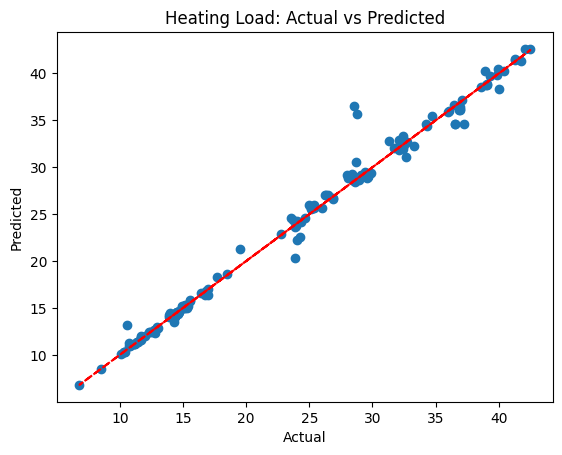

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(test['Heating_Load'], rf_preds_hl)
plt.plot(test['Heating_Load'], test['Heating_Load'], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Heating Load: Actual vs Predicted')
plt.show()




For the cooling load, our best model was Linear Regression. Here is a plot of the Linear Regression predictions against the actual results.


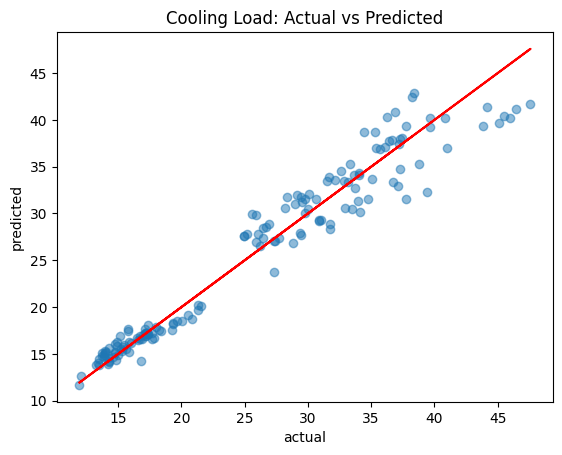

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with actual and predicted values
df = pd.DataFrame({"actual": test["Cooling_Load"], "predicted": lm_preds_cl})

# Create a scatter plot with a diagonal line showing perfect predictions
plt.scatter(df["actual"], df["predicted"], alpha=0.5)
plt.plot(df["actual"], df["actual"], color="red")

# Set the axis labels and plot title
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Cooling Load: Actual vs Predicted")

# Show the plot
plt.show()
